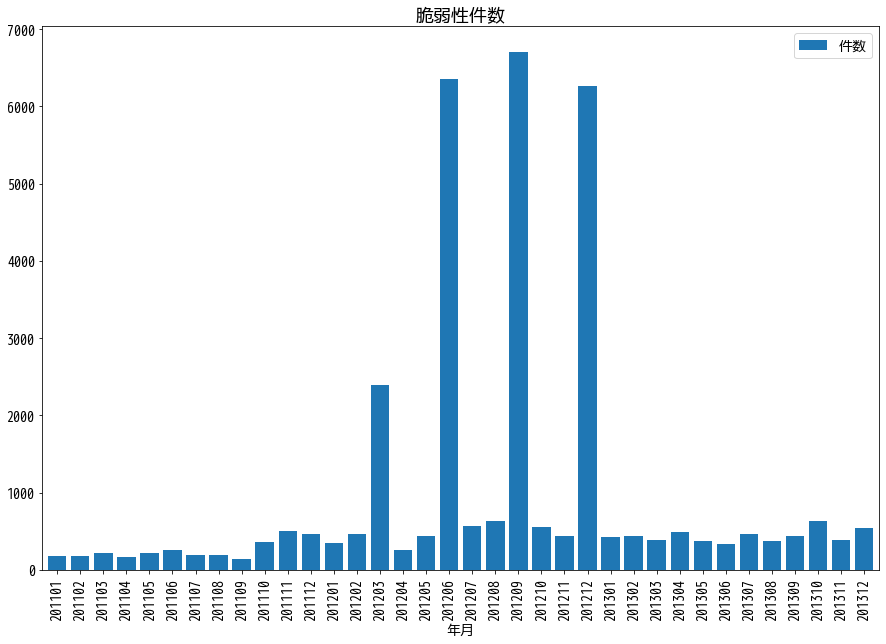

,cnt
pname,
Apple Mac OS X,3699
Android,3407
Red Hat Enterprise Linux,3275
Google Chrome,2987
Red Hat Enterprise Linux Desktop,2854
...,...
R7500 ファームウェア,101
SAP NetWeaver,101
Rational Engineering Lifecycle Manager,101


In [1]:
%matplotlib inline
import matplotlib as ml
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

font = {'family' : 'VL Gothic'}
ml.rc('font', **font)
plt.rcParams['figure.figsize'] = 15.0,10.0

connection_config = {
    'host':     'localhost',
    'port':     '15432',
    'database': 'jvn_db',
    'user':     'jvn',
    'password': 'jvn'
}
connection = psycopg2.connect(**connection_config)
stmt = """select ym, count(ym) as cnt from (select to_char(issued_date,'YYYYMM') as ym from  jvn_vulnerability 
where '2011-01-01' <= issued_date and issued_date < '2014-01-01') a group by ym order by ym;"""

rec = pd.read_sql(sql=stmt, con=connection, index_col='ym')
df = rec[(rec['cnt'] > 100)]
df.plot.bar(width=0.8)

plt.legend(['件数'], fontsize=14)
plt.tick_params(labelsize=14)
plt.xlabel('年月', fontsize=14)
plt.title('脆弱性件数', fontsize=18)
plt.show()

pd.set_option("display.max_rows", 20)

stmt = """select p.pname as pname, count(vd.cpe) as cnt
from jvn_product p, jvn_vulnerability_detail vd
where vd.cpe = p.cpe
group by p.pname
having count(vd.cpe) >= 100
order by cnt desc;"""
product = pd.read_sql(sql=stmt, con=connection,index_col='pname')

connection.close()
product

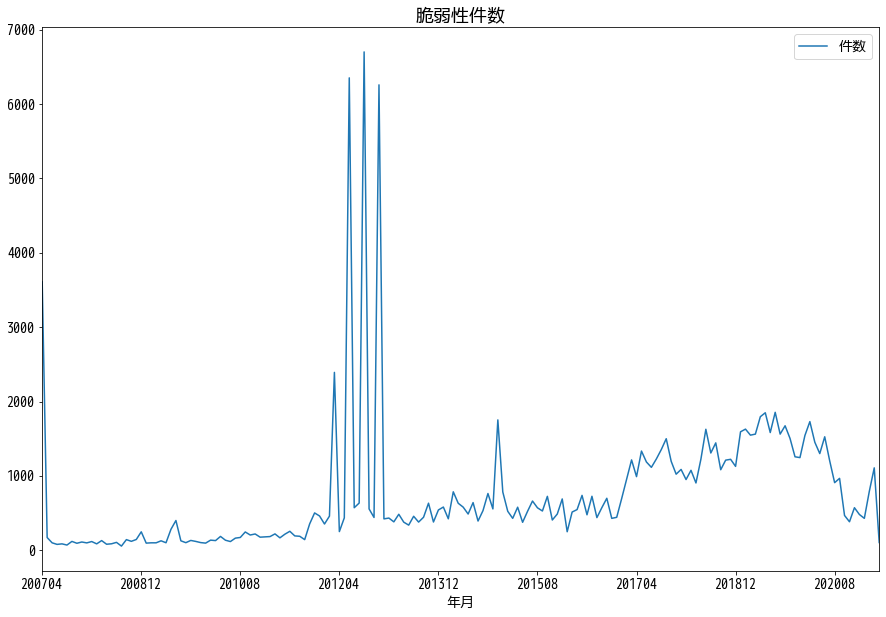

,cnt
vname,
マイクロソフト,29556
レッドハット,16813
日立,15111
アップル,14747
クアルコム,12112
...,...
チェック・ポイント・ソフトウェア・テクノロジーズ,105
横河電機株式会社,102
Ruby-lang.org,102


In [2]:
import pandas as pd
import psycopg2

font = {'family' : 'VL Gothic'}
ml.rc('font', **font)
plt.rcParams['figure.figsize'] = 15.0,10.0

connection_config = {
    'host':     'localhost',
    'port':     '15432',
    'database': 'jvn_db',
    'user':     'jvn',
    'password': 'jvn'
}
connection = psycopg2.connect(**connection_config)

stmt = "select ym, count(ym) as cnt from (select to_char(issued_date,'YYYYMM') as ym from  jvn_vulnerability) a group by ym order by ym;"
rec = pd.read_sql(sql=stmt, con=connection, index_col='ym')
rec.plot.line()
plt.legend(['件数'], fontsize=14)
plt.tick_params(labelsize=14)
plt.xlabel('年月', fontsize=14)
plt.title('脆弱性件数', fontsize=18)
plt.show()

stmt = """select m.vname as vname, count(vd.cpe) as cnt
from jvn_vendor m, jvn_product p, jvn_vulnerability_detail vd
where m.vid= p.vid
and   vd.cpe = p.cpe
group by m.vname
having count(vd.cpe) >= 100
order by cnt desc;"""

vendor = pd.read_sql(sql=stmt, con=connection,index_col='vname')

pd.set_option("display.max_rows", 20)
connection.close()

vendor

In [ ]:
plt.rcParams['axes.prop_cycle'].by_key()['color']